In [3]:
!pip install Pillow

In [1]:
!pip install Augmentor

In [2]:
!pip install keras --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


## Import libraries

In [13]:
import matplotlib.pyplot as plt
import os
import zipfile
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import Augmentor
import shutil
from collections import Counter
import random

## Functions

In [11]:
# Function to extract a ZIP file in the same folder
def extract_zip(zip_path):
    # Get the folder where the ZIP file is located
    extract_to = os.path.dirname(zip_path)

    # Open the ZIP file in 'read' mode
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # Extract all contents to the same folder
        zip_ref.extractall(extract_to)

    print(f"File extracted to: {extract_to}")


# Function to analyze images and find their sizes
def analyze_images(folder_path):
    sizes = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):  # Check image types
            img_path = os.path.join(folder_path, filename)
            with Image.open(img_path) as img:
                sizes.append(img.size)  # Save dimensions (width, height)

    return sizes

# Function to calculate the average size
def calculate_average_size(sizes):
    if sizes:
        total_width = sum(width for width, height in sizes)
        total_height = sum(height for width, height in sizes)
        count = len(sizes)
        average_size = (total_width // count, total_height // count)  # Calculate average (width, height)
        return average_size
    return None

# Function to plot the sizes of the images
def plot_image_sizes(sizes):
    widths, heights = zip(*sizes)  # Unzip the sizes into separate lists
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(widths)), widths, color='b', alpha=0.6, label='Width')
    plt.bar(range(len(heights)), heights, color='r', alpha=0.6, label='Height')
    plt.xlabel('Image Index')
    plt.ylabel('Size (pixels)')
    plt.title('Sizes of Images')
    plt.xticks(range(len(widths)))  # Set x-ticks to image indices
    plt.legend()
    plt.show()


# Function to resize images to the average size
def resize_images(folder_path, target_size, output_folder):
    os.makedirs(output_folder, exist_ok=True)  # Create output folder if it doesn't exist
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):  # Check image types
            img_path = os.path.join(folder_path, filename)
            with Image.open(img_path) as img:
                img = img.resize(target_size, Image.Resampling.LANCZOS)  # Resize the image
                img.save(os.path.join(output_folder, filename))  # Save resized image to output folder

# Function to augment images
def augment_images(input_folder, output_folder, num_augmented_images=4):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Initialize the image data generator with various augmentation techniques
    datagen = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                                 height_shift_range=0.1, shear_range=0.2,
                                 zoom_range=0.2, horizontal_flip=True,
                                 fill_mode='nearest')

    # Loop through each image file in the input folder
    for filename in os.listdir(input_folder):
        # Check if the file is an image (with the specified extensions)
        if filename.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            img_path = os.path.join(input_folder, filename)  # Full path of the image
            img = Image.open(img_path)  # Open the image using PIL
            img_array = np.array(img)   # Convert the image to a numpy array
            img_array = img_array.reshape((1,) + img_array.shape)  # Reshape the image array to fit the data generator

            # Generate augmented images
            i = 0
            for batch in datagen.flow(img_array, batch_size=1,
                                       save_to_dir=output_folder,  # Save the augmented images to the output folder
                                       save_prefix='aug', save_format='jpeg'):  # Save format and prefix
                i += 1
                if i >= num_augmented_images:
                    break  # Stop when the desired number of augmented images is generated


# Function to display a sample of images from a folder
def display_sample_images(folder_path, num_images=5):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    if len(image_files) < num_images:
        print(f"Folder contains less than {num_images} images.")
        num_images = len(image_files)

    sample_files = random.sample(image_files, num_images)  # Randomly select a few images

    plt.figure(figsize=(12, 6))
    for i, file in enumerate(sample_files):
        img_path = os.path.join(folder_path, file)
        img = Image.open(img_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(file)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

## Extract Data zip folder

In [5]:
extract_zip('/content/Example_Data.zip')

File extracted to: /content


## Analysis and resizing images

Average size: (965, 1055)


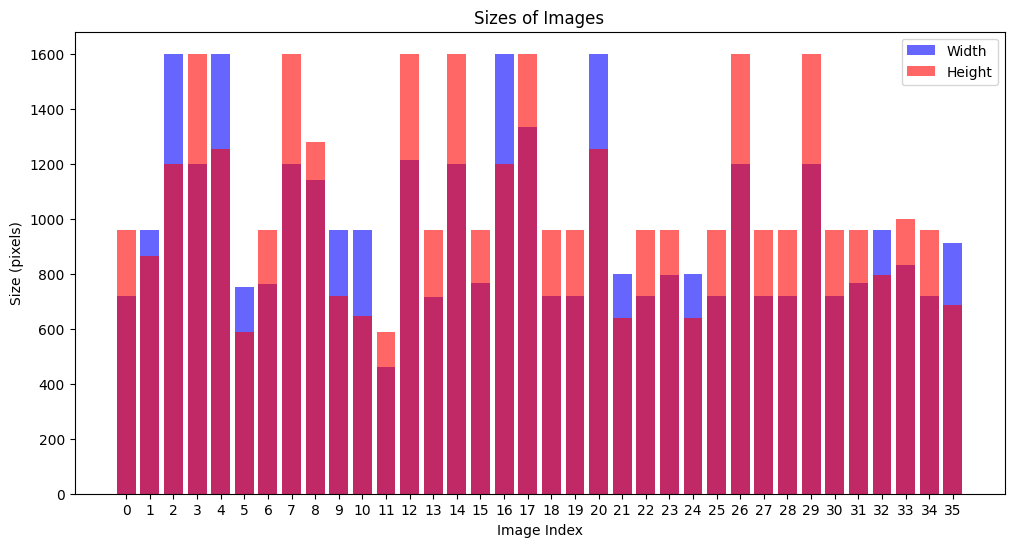

In [7]:
 # Path to the folder containing images
folder_path = 'Example_Data'  # Change this to your Data folder path
output_folder = '/content/resized_images'  # New folder for resized images

# Analyze images
sizes = analyze_images(folder_path)

# Calculate the average size
average_size = calculate_average_size(sizes)

if average_size:
    print(f"Average size: {average_size}")  # Print the average size

    # Resize images to the average size and save in the output folder
    resize_images(folder_path, average_size, output_folder)

    # Plot the sizes of the images
    plot_image_sizes(sizes)
else:
    print("No images found in the folder.")

## Augment images

In [8]:
augmented_folder = '/content/augmented_images'
augment_images(output_folder, augmented_folder)

## Show samples of augmented data

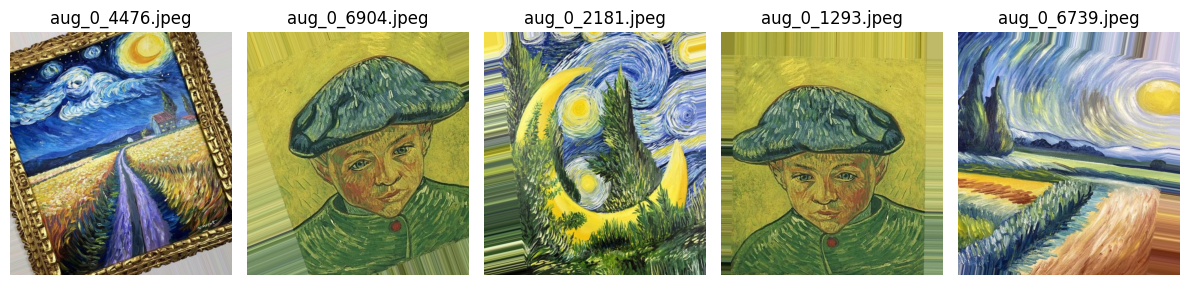

In [12]:
display_sample_images('/content/augmented_images' , num_images=5)

# Finally the data will be at augmented_images folder